In [1]:
import pandas as pd
import numpy as np

# Number of rows
num_rows = 99500

# Generate random customer IDs
customer_ids = [f"CUST{str(i).zfill(5)}" for i in range(1, num_rows + 1)]

# Generate random data
num_orders = np.random.randint(1, 20, num_rows)  # Number of orders (1-20)
spent_amount = np.random.uniform(100, 10000, num_rows).round(2)  # Spent amount (₹100 - ₹10,000)
installments = np.random.randint(1, 24, num_rows)  # Installments (1-24 months)
age = np.random.randint(18, 70, num_rows)  # Age (18-70 years)
potential = np.random.choice(["Low", "Medium", "High"], num_rows, p=[0.3, 0.5, 0.2])  # Customer potential

# Create DataFrame
df = pd.DataFrame({
    "customer_id": customer_ids,
    "num_orders": num_orders,
    "spent_amount": spent_amount,
    "installments": installments,
    "age": age,
    "potential": potential
})

# Save to CSV
df.to_csv("customer_data.csv", index=False)

print("Dataset saved as 'customer_data.csv'.")


Dataset saved as 'customer_data.csv'.


In [2]:
df.head()


,customer_id,num_orders,spent_amount,installments,age,potential
0,CUST00001,13,1225.61,14,68,Low
1,CUST00002,13,9371.33,6,37,Low
2,CUST00003,17,3492.00,3,68,Medium
3,CUST00004,12,705.25,20,20,Low
4,CUST00005,17,1028.91,13,49,Low


In [3]:
from IPython.display import display
display(df)


,customer_id,num_orders,spent_amount,installments,age,potential
0,CUST00001,13,1225.61,14,68,Low
1,CUST00002,13,9371.33,6,37,Low
2,CUST00003,17,3492.00,3,68,Medium
3,CUST00004,12,705.25,20,20,Low
4,CUST00005,17,1028.91,13,49,Low
...,...,...,...,...,...,...
99495,CUST99496,17,1407.09,18,38,Low
99496,CUST99497,2,1304.40,23,34,Medium
99497,CUST99498,12,8544.42,11,39,Medium
99498,CUST99499,9,2566.93,19,53,Medium


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
df = pd.read_csv("customer_data.csv")  # Load the dataset
df.head()

,customer_id,num_orders,spent_amount,installments,age,potential
0,CUST00001,13,1225.61,14,68,Low
1,CUST00002,13,9371.33,6,37,Low
2,CUST00003,17,3492.00,3,68,Medium
3,CUST00004,12,705.25,20,20,Low
4,CUST00005,17,1028.91,13,49,Low


In [6]:
df.dropna(inplace=True)  # Removes missing values
df.info()  # Displays dataset details


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99500 entries, 0 to 99499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   99500 non-null  object 
 1   num_orders    99500 non-null  int64  
 2   spent_amount  99500 non-null  float64
 3   installments  99500 non-null  int64  
 4   age           99500 non-null  int64  
 5   potential     99500 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [9]:
customers = pd.read_csv("customer_data.csv")

In [10]:
customers

,customer_id,num_orders,spent_amount,installments,age,potential
0,CUST00001,13,1225.61,14,68,Low
1,CUST00002,13,9371.33,6,37,Low
2,CUST00003,17,3492.00,3,68,Medium
3,CUST00004,12,705.25,20,20,Low
4,CUST00005,17,1028.91,13,49,Low
...,...,...,...,...,...,...
99495,CUST99496,17,1407.09,18,38,Low
99496,CUST99497,2,1304.40,23,34,Medium
99497,CUST99498,12,8544.42,11,39,Medium
99498,CUST99499,9,2566.93,19,53,Medium


In [11]:
features = ["num_orders", "spent_amount", "installments", "age"]

In [12]:
customers = customers.dropna(subset=features)

In [13]:
data = customers[features].copy()

In [14]:
data

,num_orders,spent_amount,installments,age
0,13,1225.61,14,68
1,13,9371.33,6,37
2,17,3492.00,3,68
3,12,705.25,20,20
4,17,1028.91,13,49
...,...,...,...,...
99495,17,1407.09,18,38
99496,2,1304.40,23,34
99497,12,8544.42,11,39
99498,9,2566.93,19,53


In [15]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [16]:
data.describe()

,num_orders,spent_amount,installments,age
count,99500.000000,99500.000000,99500.000000,99500.000000
mean,5.506704,5.498682,5.499363,5.500114
std,2.736472,2.595205,2.712668,2.646778
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.259966,3.045455,3.117647
50%,5.500000,5.487859,5.500000,5.588235
75%,8.000000,7.731536,7.954545,7.705882
max,10.000000,10.000000,10.000000,10.000000


In [17]:
data.head()

,num_orders,spent_amount,installments,age
0,7.0,2.023253,6.318182,9.823529
1,7.0,9.428505,3.045455,4.352941
2,9.0,4.083622,1.818182,9.823529
3,6.5,1.550195,8.772727,1.352941
4,9.0,1.844433,5.909091,6.470588


In [21]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)    

In [22]:
centroids = random_centroids(data, 5)

C:\Users\PANDU SAGAR\AppData\Local\Temp\ipykernel_21532\1979965431.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [23]:
centroids

,0,1,2,3,4
num_orders,9.000000,1.000000,5.500000,1.000000,2.500000
spent_amount,9.978691,4.912600,4.418451,3.918348,2.528584
installments,4.272727,7.545455,1.409091,7.954545,1.818182
age,4.352941,3.470588,6.470588,3.117647,8.411765


In [27]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [28]:
labels = get_labels(data, centroids)

In [29]:
labels.value_counts()

2    32196
0    25387
1    20809
3    11879
4     9229
Name: count, dtype: int64

In [32]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [36]:
def plot_clusters(data, labels, centroids,iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt. scatter (x=data_2d [:,0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:, 1])
    plt. show( )


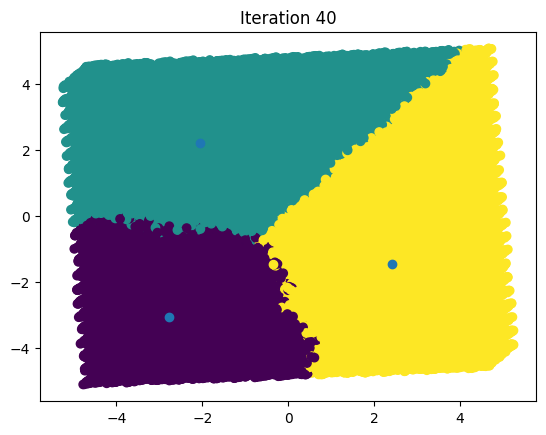

In [38]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame ()
iteration = 1

while iteration < max_iterations and not centroids.equals (old_centroids):
    old_centroids = centroids
    
    labels = get_labels (data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [39]:
centroids

,0,1,2
num_orders,2.657017,3.685607,7.947073
spent_amount,4.734275,4.692617,4.817881
installments,2.657562,7.900339,3.977678
age,4.567273,4.743239,4.775028


In [45]:
 customers[labels ==0] [["customer_id"] + features]

,customer_id,num_orders,spent_amount,installments,age
18,CUST00019,8,6302.98,11,28
23,CUST00024,7,7593.23,10,27
26,CUST00027,1,8852.46,10,68
27,CUST00028,1,2914.72,6,30
32,CUST00033,2,7411.89,9,25
...,...,...,...,...,...
99471,CUST99472,5,6559.56,1,44
99484,CUST99485,7,6028.73,9,63
99485,CUST99486,6,424.16,11,37
99488,CUST99489,1,980.52,7,43


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("customer_data.csv")

# Title of the app
st.title("📊 Customer Data Segmentation")

# Dropdown to select the filtering criterion
option = st.selectbox(
    "🔍 Select a criterion to filter customers:",
    ("num_orders", "spent_amount", "installments", "age")
)

# Input field for the exact value
threshold = st.number_input(f"Enter an exact value for {option}:", min_value=0)

# Filter the dataset based on the exact match condition (== instead of >=)
filtered_df = df[df[option] == threshold]

# Display the results
st.write(f"### 📋 Showing customers where **{option}** is exactly **{threshold}**")
st.dataframe(filtered_df)

# Show basic statistics
st.write("### 📊 Dataset Overview:")
st.write(df.describe())

# Graphical representation of the filtered data
if not filtered_df.empty:
    st.write(f"### 🎨 Visual Representation of {option}:")
    
    # Create a Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Seaborn bar plot for better visualization
    sns.histplot(filtered_df[option], bins=10, kde=True, color="skyblue", ax=ax)
    
    # Labels and title
    ax.set_xlabel(option.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Distribution of {option}", fontsize=14)
    
    # Display the plot in Streamlit
    st.pyplot(fig)


In [ ]:
!streamlit run app.py